# Inciso 1
Implementar los algoritmos de Runge-Kutta (de orden 4) para resolver una EDO, y para resolver un sistema de EDO. Estos algoritmos se usarán en los siguientes problemas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
def rk4_single(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = y0
    results = [(t, y)]
    
    for _ in range(n):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
        results.append((t, y))
    
    return results

In [3]:
def rk4_system(f, y0, t0, tf, h):
    n = int((tf - t0) / h)
    t = t0
    y = np.array(y0)
    results = [(t, y)]
    
    for _ in range(n):
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        t = t + h
        results.append((t, y))
    
    return results

Implementación de función que grafica el campo vectorial o plano de fase para un sistema de EDO's

In [4]:
def plot_phase_plane(f, y_range, t_range, density=20):
    y1 = np.linspace(y_range[0], y_range[1], density)
    y2 = np.linspace(y_range[0], y_range[1], density)
    Y1, Y2 = np.meshgrid(y1, y2)
    
    U, V = np.zeros(Y1.shape), np.zeros(Y2.shape)
    
    for i in range(Y1.shape[0]):
        for j in range(Y1.shape[1]):
            t = 0
            y = [Y1[i, j], Y2[i, j]]
            dydt = f(t, y)
            U[i, j] = dydt[0]
            V[i, j] = dydt[1]
    
    plt.figure()
    plt.quiver(Y1, Y2, U, V, color='r')
    plt.streamplot(Y1, Y2, U, V, color='b')
    plt.xlabel('y1')
    plt.ylabel('y2')
    plt.title('Plano de Fase')
    plt.show()

Implementación de función clasificadora de puntos de equilibrio.

In [5]:
def classify_equilibrium_point(f, equilibrium_point):
    def jacobian(f, y, h=1e-5):
        n = len(y)
        J = np.zeros((n, n))
        f0 = np.array(f(0, y))
        for i in range(n):
            y1 = np.array(y, dtype=float)
            y1[i] += h
            fi = np.array(f(0, y1))
            J[:, i] = (fi - f0) / h
        return J
    
    J = jacobian(f, equilibrium_point)
    eigenvalues = np.linalg.eigvals(J)
    
    print("Punto de equilibrio:", equilibrium_point)
    print("Eigenvalores:", eigenvalues)
    
    if np.all(np.real(eigenvalues) < 0):
        if np.all(np.imag(eigenvalues) == 0):
            return "Nodo atractor"
        else:
            return "Espiral atractor"
    elif np.all(np.real(eigenvalues) > 0):
        if np.all(np.imag(eigenvalues) == 0):
            return "Nodo repulsor"
        else:
            return "Espiral repulsor"
    elif np.any(np.real(eigenvalues) < 0) and np.any(np.real(eigenvalues) > 0):
        if np.all(np.imag(eigenvalues) == 0):
            return "Punto silla"
        else:
            return "Espiral"
    elif np.any(np.real(eigenvalues) == 0) and np.any(np.imag(eigenvalues) == 0):
        return "Twist"
    else:
        return "Centro"

Implimentación para graficar los resultados de Runge-Kutta

In [6]:
def plot_rk4_results(result, title="Resultados del sistema de ecuaciones diferenciales"):
    t_values = [t for t, y in result]
    solutions = list(zip(*[y for t, y in result]))

    plt.figure(figsize=(10, 6))
    for i, solution in enumerate(solutions):
        plt.plot(t_values, solution, label=f'Solución {i+1}')
    
    plt.title(title)
    plt.xlabel('Tiempo')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)
    plt.show()

Implementación para estimar población y período

In [7]:
def estimate_population_and_period(result, years=5):
    t_values = [t for t, y in result]
    solutions = list(zip(*[y for t, y in result]))
    
    final_time = t_values[-1]
    target_time = years
    closest_index = np.argmin(np.abs(np.array(t_values) - target_time))
    population_estimate = {
        'x': solutions[0][closest_index],
        'y': solutions[1][closest_index]
    }
    
    x_values = solutions[0]
    y_values = solutions[1]
    
    def find_period(values):
        peaks = [i for i in range(1, len(values)-1) if values[i-1] < values[i] > values[i+1]]
        if len(peaks) > 1:
            periods = [t_values[peaks[i+1]] - t_values[peaks[i]] for i in range(len(peaks)-1)]
            return np.mean(periods)
        return None
    
    period_x = find_period(x_values)
    period_y = find_period(y_values)
    
    period = {
        'x': period_x,
        'y': period_y
    }
    
    return population_estimate, period

Implementación para imprimir el plano de fase con las trayectorias del resultado y el campo vectorial

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_phase_plane_with_trajectories(f, result, y_range, t_range, years=5, density=20):
    y1 = np.linspace(y_range[0], y_range[1], density)
    y2 = np.linspace(y_range[0], y_range[1], density)
    Y1, Y2 = np.meshgrid(y1, y2)
    
    U, V = np.zeros(Y1.shape), np.zeros(Y2.shape)
    
    for i in range(Y1.shape[0]):
        for j in range(Y1.shape[1]):
            t = 0
            y = [Y1[i, j], Y2[i, j]]
            dydt = f(t, y)
            U[i, j] = dydt[0]
            V[i, j] = dydt[1]
    
    plt.figure(figsize=(10, 6))
    plt.quiver(Y1, Y2, U, V, color='gray')
    plt.streamplot(Y1, Y2, U, V, color='lightgray')
    
    t_values = [t for t, y in result]
    x_values = [y[0] for t, y in result]
    y_values = [y[1] for t, y in result]
    
    plt.plot(x_values, y_values, label='Trayectoria', color='blue')
    
    closest_index = np.argmin(np.abs(np.array(t_values) - years))
    plt.scatter(x_values[0], y_values[0], color='green', label='Población inicial', zorder=5)
    plt.scatter(x_values[closest_index], y_values[closest_index], color='red', label='Población final a los 5 años', zorder=5)
    
    plt.xlabel('x (Población de la especie x)')
    plt.ylabel('y (Población de la especie y)')
    plt.title('Plano de Fase con Trayectorias y Campo Vectorial')
    plt.legend()
    plt.grid(True)
    plt.show()

# Inciso 2

Dos poblaciones de animales $x(t)$ y $y(t)$ satisfacen el siguiente sistema de EDO:

\begin{cases}
x'(t) = 0.2x - 0.005xy \\
y'(t) = -0.5y + 0.01xy
\end{cases}

In [9]:
def predator_prey_system(t, y):
    x, y = y
    dxdt = 0.2 * x - 0.005 * x * y
    dydt = -0.5 * y + 0.01 * x * y
    return [dxdt, dydt]

Aquí, la escala de tiempo se mide en meses.
Nos interesa la trayectoria y el campo de direcciones que este sistema forma en el primer cuadrante del plano $xy$ (ya que $x(t)$, $y(t)$ son ambas cantidades de individuos, sólo tiene sentido cuando estas son cantidades no-negativas). Resolver lo siguiente:

**a)** Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO

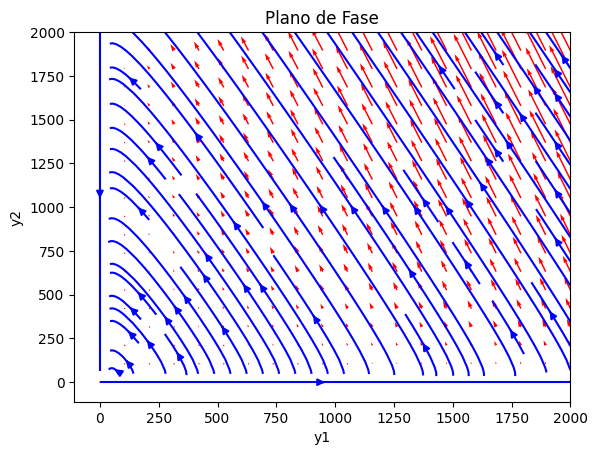

In [10]:
plot_phase_plane(predator_prey_system, [0, 2000], [0, 2000])

**b)** Usando algoritmos computacionales, encuentre todos los puntos de equilibrio del sistema de EDO (sólo los que están en el primer cuadrante, incluyendo los ejes y el origen), y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente cómo se comportan las soluciones cerca del punto de equilibrio obtenido.

Declaración de función envoltura para obtener los puntos de equilibrio:

In [11]:
def predator_prey_system_wrapper(y):
    return predator_prey_system(0, y)

Definición de varios puntos inciales:

In [12]:
puntos_iniciales = [
    [1, 1],
    [40, 50],
    [1000, 1000],
    [2000, 1000],
    [1000, 2000],
    [2000, 2000]
]

In [13]:
puntos_de_equilibrio = set()
for punto in puntos_iniciales:
    punto_de_equilibrio = fsolve(predator_prey_system_wrapper, punto)
    puntos_de_equilibrio.add(tuple(np.round(punto_de_equilibrio, 2)))

print("Puntos de equilibrio:")
for punto in puntos_de_equilibrio:
    print(f"(x: {punto[0]}, y: {punto[1]})")

Puntos de equilibrio:
(x: 50.0, y: 40.0)
(x: -0.0, y: 0.0)


Clasificación de puntos de equilibrio

In [14]:
for punto in puntos_de_equilibrio:
    clasificacion = classify_equilibrium_point(predator_prey_system, punto)
    print(f"Clasificación del punto de equilibrio {punto}: {clasificacion}")
    print("") 

Punto de equilibrio: (50.0, 40.0)
Eigenvalores: [0.+0.31622777j 0.-0.31622777j]
Clasificación del punto de equilibrio (50.0, 40.0): Centro

Punto de equilibrio: (-0.0, 0.0)
Eigenvalores: [ 0.2 -0.5]
Clasificación del punto de equilibrio (-0.0, 0.0): Punto silla



**c)** Resuelva el sistema de EDO, con su algoritmo Runge-Kutta, para la condición incial
$$x(0) = 70, \ \ \ \ y(0) = 30$$

Se definen las condiciones iniciales

In [15]:
z0 = np.array([70, 30])
t0 = 0
tf = 100
h = 0.01

Se resuelve el sistema

In [16]:
result_1 = rk4_system(predator_prey_system, z0, t0, tf, h)

Obtenga una gráfica de la solución obtenida, y estime cuál será la población para las especies $x$ y $y$ después de 5 años. Aproxime cuál es el valor del período o ciclo de repetición de las poblaciones.

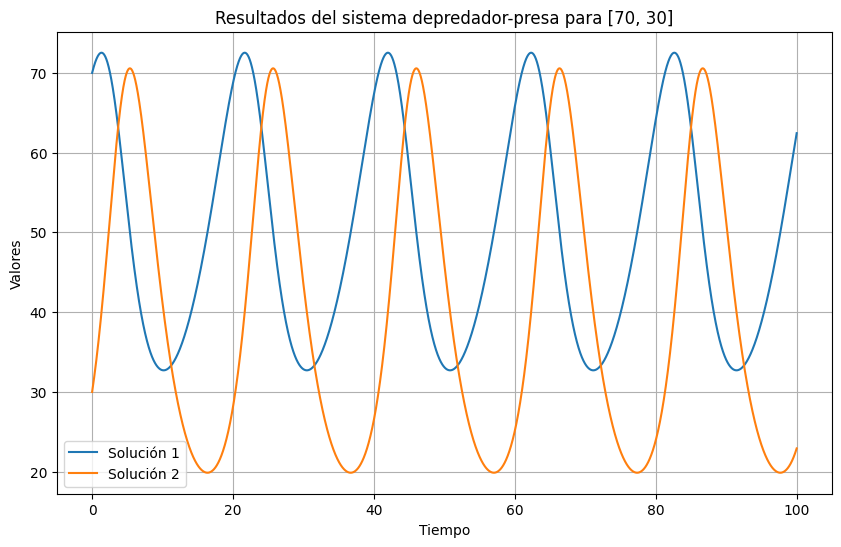

In [17]:
plot_rk4_results(result_1, title="Resultados del sistema depredador-presa para [70, 30]")

Estimación de las especies $x$ y $y$ después de 5 años, incluyendo período

In [18]:
population_estimate, period = estimate_population_and_period(result_1, years=5)
print(f"Población estimada después de 5 años: {population_estimate}")
print(f"Período aproximado de las poblaciones: {period}")

Población estimada después de 5 años: {'x': 52.80790505748697, 'y': 70.21578685011013}
Período aproximado de las poblaciones: {'x': 20.327500000001343, 'y': 20.327500000001876}


**d)** Repita la solución del sistema de EDO, esta vez para la condición inicial
$$
x(0) = 100, \ \ \ \ y(0) = 10
$$

Se definen las condiciones iniciales

In [19]:
z0 = np.array([100, 10])
t0 = 0
tf = 100
h = 0.01

Se resuelve el sistema

In [20]:
result_2 = rk4_system(predator_prey_system, z0, t0, tf, h)

Obtenga una gráfica de la solución obtenida, y estime cuál será la población para las especies $x$ y $y$ después de 5 años. Aproxime cuál es el valor del período o ciclo de repetición de las poblaciones.

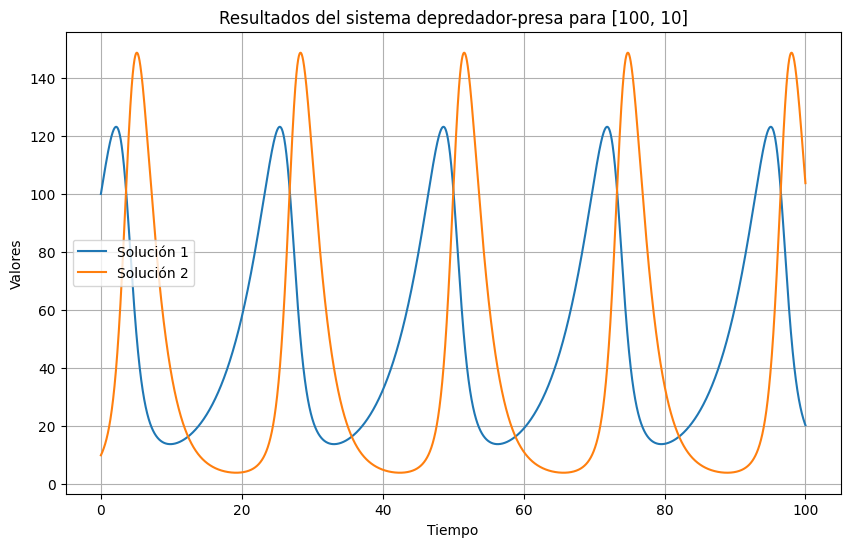

In [21]:
plot_rk4_results(result_2, title="Resultados del sistema depredador-presa para [100, 10]")

Estimación de las especies $x$ y $y$ después de 5 años, incluyendo período

In [22]:
population_estimate, period = estimate_population_and_period(result_2, years=5)
print(f"Población estimada después de 5 años: {population_estimate}")
print(f"Período aproximado de las poblaciones: {period}")

Población estimada después de 5 años: {'x': 52.910149502912745, 'y': 148.42087698065714}
Período aproximado de las poblaciones: {'x': 23.232500000002936, 'y': 23.23250000000333}


**e)** Grafique ambas trayectorias obtenidas en su plano de fase $xy$ (encima del campo vectorial). Ilustre en la gráfica el valor de la población inicial y final (a los 5 años) en cada caso.

Trayectorias con [70, 30]

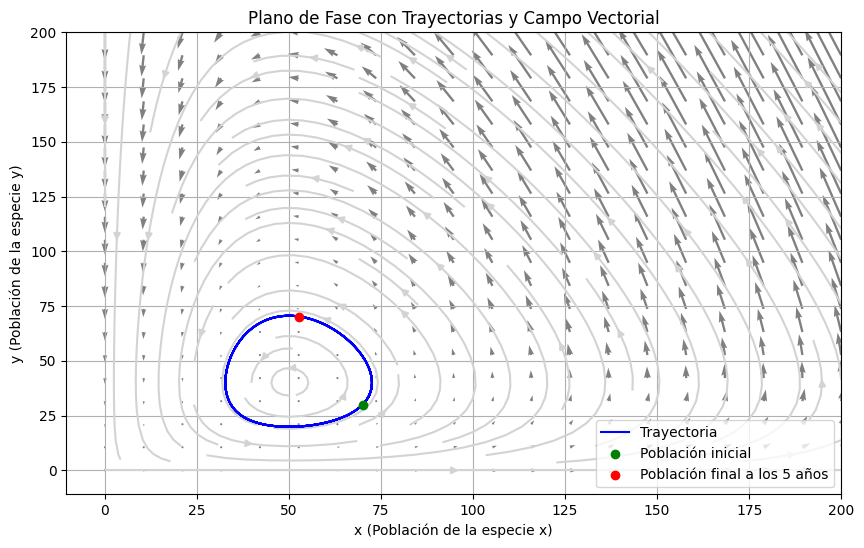

In [23]:
plot_phase_plane_with_trajectories(predator_prey_system, result_1, y_range=[0, 200], t_range=[0, 200], years=5, density=20)

Trayectorias con [100, 10]

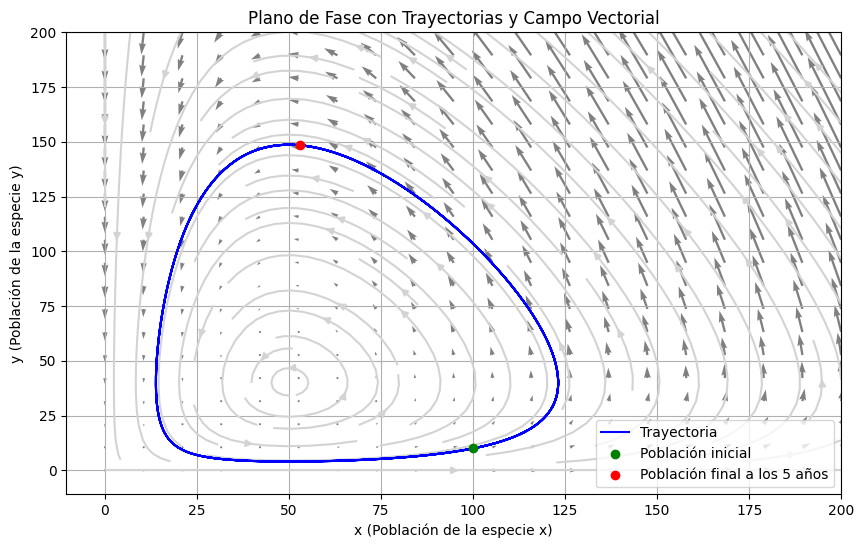

In [24]:
plot_phase_plane_with_trajectories(predator_prey_system, result_2, y_range=[0, 200], t_range=[0, 200], years=5, density=20)

**f)** Explique o describa cualitativamente el comportamiento del sistema de poblaciones

El sistema de ecuaciones diferenciales dado describe la interacción entre dos especies en un modelo depredador-presa. Las ecuaciones son:


\begin{cases}
x'(t) = 0.2x - 0.005xy \\
y'(t) = -0.5y + 0.01xy
\end{cases}


Donde:
- $x(t)$ representa la población de la especie presa.
- $y(t)$ representa la población de la especie depredadora.

### Comportamiento cualitativo:

1. **Crecimiento de la presa en ausencia de depredadores**:
   - La ecuación $x'(t) = 0.2x$ indica que, en ausencia de depredadores $y = 0$, la población de presas crece exponencialmente a una tasa del 20% por unidad de tiempo.

2. **Disminución de la depredadora en ausencia de presas**:
   - La ecuación $y'(t) = -0.5y$ indica que, en ausencia de presas $x = 0$, la población de depredadores disminuye exponencialmente a una tasa del 50% por unidad de tiempo.

3. **Interacción depredador-presa**:
   - El término $-0.005xy$ en la ecuación de $x'(t)$ representa la disminución de la población de presas debido a la depredación. La tasa de disminución es proporcional al producto de las poblaciones de presas y depredadores.
   - El término $0.01xy$ en la ecuación de $y'(t)$ representa el aumento de la población de depredadores debido a la disponibilidad de presas. La tasa de aumento es proporcional al producto de las poblaciones de presas y depredadores.

### Dinámica del sistema:

- **Oscilaciones**:
  - El sistema tiende a mostrar oscilaciones periódicas en las poblaciones de ambas especies. Cuando la población de presas es alta, la población de depredadores aumenta debido a la abundancia de alimento. Sin embargo, a medida que la población de depredadores crece, la población de presas disminuye debido a la mayor depredación. Esto, a su vez, causa una disminución en la población de depredadores debido a la falta de alimento, permitiendo que la población de presas se recupere y el ciclo se repita.

- **Equilibrio**:
  - El sistema puede alcanzar un punto de equilibrio donde las poblaciones de ambas especies se estabilizan. Este punto de equilibrio depende de las tasas de crecimiento y depredación especificadas en las ecuaciones.

En resumen, el sistema de ecuaciones diferenciales describe un modelo clásico de depredador-presa con oscilaciones periódicas en las poblaciones de ambas especies, influenciadas por las tasas de crecimiento y depredación.

# Inciso 3